In [66]:
import tensorflow as td
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
# Step 1: Upload and read the CSV
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Get the uploaded filename
filename = list(uploaded.keys())[0]

# Read CSV
data = pd.read_csv(filename)

# Step 2: Drop columns (without inplace, with reassignment)
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

Saving Churn_Modelling.csv to Churn_Modelling (6).csv


In [68]:
data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [78]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
data['Geography'] = data['Geography'].map({'France': 0, 'Germany': 1, 'Spain': 2})

In [79]:
# Step 3: Print or preview the cleaned data
data.head(20)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


In [81]:
x = data.drop(columns=['Exited'])
y = data['Exited']

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [111]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Build the model
model = Sequential()
model.add(Dense(20, activation='sigmoid', input_dim=10))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(11, activation='sigmoid'))
model.add(Dense(11, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [112]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [113]:
history = model.fit(x_train_scaled,y_train,epochs=100,batch_size=50,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2433 - loss: 0.9250 - val_accuracy: 0.7987 - val_loss: 0.6092
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7937 - loss: 0.5777 - val_accuracy: 0.7987 - val_loss: 0.5194
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7884 - loss: 0.5239 - val_accuracy: 0.7987 - val_loss: 0.5043
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7957 - loss: 0.5073 - val_accuracy: 0.7987 - val_loss: 0.5019
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7864 - loss: 0.5180 - val_accuracy: 0.7987 - val_loss: 0.5010
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7888 - loss: 0.5143 - val_accuracy: 0.7987 - val_loss: 0.5003
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7912 - loss: 0.5104 - val_accuracy: 0.7987 - val_loss: 0.4991
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7829 - loss: 0.5198 - val_accu

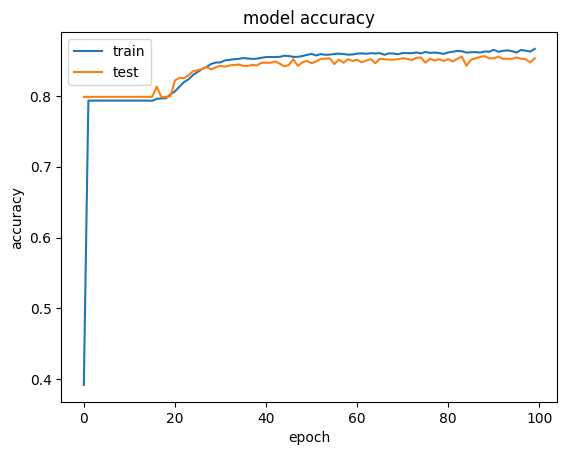

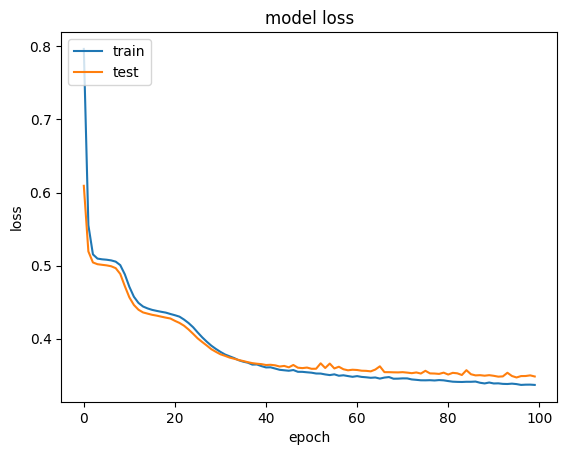

In [114]:
# prompt: lose graph

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [115]:
# prompt: prediction function

def predict_exit(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary):

  # Create a NumPy array with the input features
  input_data = np.array([[CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]])

  # Scale the input data using the same scaler used for training
  input_data_scaled = scaler.transform(input_data)

  # Make the prediction
  prediction = model.predict(input_data_scaled)

  # Return the prediction (0 or 1)
  return (prediction > 0.5).astype(int)[0][0]


In [120]:

# Get the values of the first row
row1_values = data.iloc[2].values

# Extract the relevant features for prediction
CreditScore = row1_values[0]
Geography = row1_values[1]
Gender = row1_values[2]
Age = row1_values[3]
Tenure = row1_values[4]
Balance = row1_values[5]
NumOfProducts = row1_values[6]
HasCrCard = row1_values[7]
IsActiveMember = row1_values[8]
EstimatedSalary = row1_values[9]

# Call the prediction function with the values from row1
prediction = predict_exit(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary)

print(f"Prediction for row 1: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction for row 1: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
